# Import a dataset

In [13]:
import pandas as pd 
import os

print (os.getcwd())


df = pd.read_csv('EXP/PE_EXP1_Angle.csv')

df.head()


/home/huuthanhvy.nguyen001/kenichiLLMP


,query,raw_answer,parsed_answer,model,ground_truth,mean,mse,mlae,time,forced_repetitions
0,q1,44,44.0,gpt4o,10,44.0,1156.0,11.731372,29162.190437,4
1,q1,user\n\n\nLook at the image. It shows two line...,60.0,LLaMA,10,60.0,2500.0,12.287748,21650.283575,0
2,q1,user\n\n\nLook at the image. It shows two line...,45.0,CustomLLaMA,10,45.0,1225.0,11.773191,6415.693760,0
3,q1,135 \n,135.0,GeminiProVision,10,135.0,15625.0,13.609655,5870.520830,0
4,q1,90,90.0,Gemini1_5Flash,10,90.0,6400.0,12.965807,5321.798563,0


# Plot MLAE comparison across models and queries

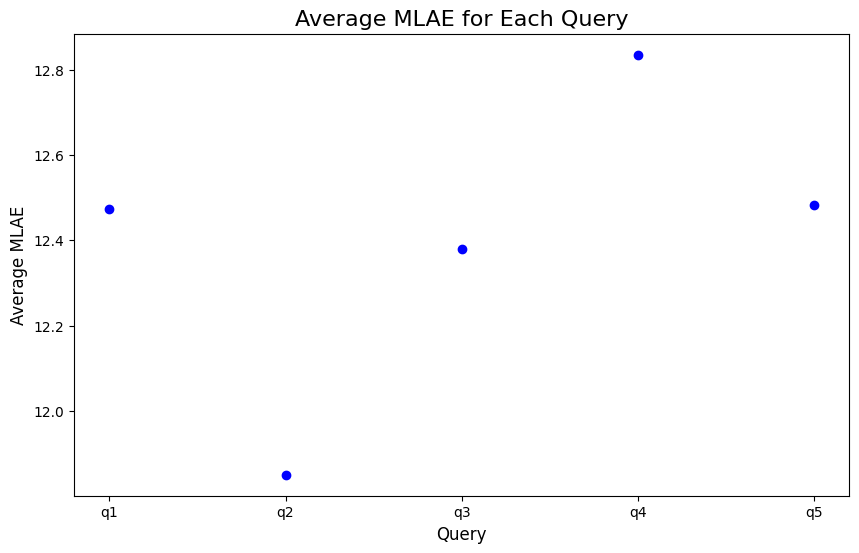

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'query' and calculate the average MLAE
query_avg_mlae = df.groupby('query')['mlae'].mean().reset_index()

# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(query_avg_mlae['query'], query_avg_mlae['mlae'], color='blue')

# Add title and labels
plt.title('Average MLAE for Each Query', fontsize=16)
plt.xlabel('Query', fontsize=12)
plt.ylabel('Average MLAE', fontsize=12)

# Show the plot
plt.show()

# Caculate averages of run for each model

In [ ]:
##Later use

import pandas as pd
import numpy as np
import scipy.stats as stats

# Sample Data (your dataset)
data = {
    'Query': ['q1', 'q1', 'q1', 'q1', 'q2', 'q2', 'q2', 'q2', 'q3', 'q3', 'q3', 'q3', 'q4', 'q4', 'q4', 'q4', 'q5', 'q5', 'q5', 'q5'],
    'Model': ['gpt4o', 'gpt4vision', 'GeminiProVision', 'Gemini1_5Flash', 'gpt4o', 'gpt4vision', 'GeminiProVision', 'Gemini1_5Flash', 'gpt4o', 'gpt4vision', 'GeminiProVision', 'Gemini1_5Flash', 'gpt4o', 'gpt4vision', 'GeminiProVision', 'Gemini1_5Flash', 'gpt4o', 'gpt4vision', 'GeminiProVision', 'Gemini1_5Flash'],
    'MLAE': [11.344365, 12.001452, 12.574623, 12.574623, 11.344365, 11.598111, 12.001452, 10.891879, 11.344365, 12.001452, 12.001452, 10.891879, 11.344365, 11.344365, 11.344365, 10.891879, 11.344365, 11.598111, 12.316317, 10.891879]
}

# Step 1: Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Group by 'Model' to calculate the mean and standard deviation of MLAE for each model
model_stats = df.groupby('Model')['MLAE'].agg(['mean', 'std', 'count']).reset_index()

# Step 3: Choose a confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # z-score for 95% confidence

# Step 4: Calculate the margin of error and confidence intervals
model_stats['margin_of_error'] = z_score * (model_stats['std'] / np.sqrt(model_stats['count']))
model_stats['ci_lower'] = model_stats['mean'] - model_stats['margin_of_error']
model_stats['ci_upper'] = model_stats['mean'] + model_stats['margin_of_error']

# Step 5: Display the results
print(model_stats[['Model', 'mean', 'std', 'count', 'ci_lower', 'ci_upper']])
